# Krzywa oceny hiperparametrów _validation curve

Przy budowie modelów ML występuje problrm dobrania najlepszych parametrów. Poniżej dowiemy się jak dobierać optymalne hiperparametry dla modelu.
źródło: https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6

https://chrisalbon.com/machine_learning/model_evaluation/plot_the_validation_curve/

In [1]:
import numpy as np
import pandas as pd
#import xgboost as xgb
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
import matplotlib.pylab as plt

from pylab import plot, show, subplot, specgram, imshow, savefig
from sklearn import preprocessing
#from sklearn import cross_validation, metrics
from sklearn.preprocessing import Normalizer
#from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import Imputer

import matplotlib.pyplot as plote

%matplotlib inline

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('c:/1/bank.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,age,job,marital,education,default,housing,loan,contact,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,0,0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,1,1,53,technician,married,unknown,no,no,no,cellular,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,2,2,28,management,single,university.degree,no,yes,no,cellular,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,3,3,39,services,married,high.school,no,no,no,cellular,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,4,4,55,retired,married,basic.4y,no,yes,no,cellular,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


# Skalowanie standardowe tylko dla wartości dyskretnych

Wybieram kolumny tkstowe, dyskretne, do głębszej analizy. Lepsze było to wybieranie dyskretne i ciągłe.

In [3]:
encoding_list = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week','poutcome']

In [4]:
df[encoding_list] = df[encoding_list].apply(LabelEncoder().fit_transform)

In [5]:
df[encoding_list].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,1,1,0,1,2,0,0,1,2,1
1,9,1,7,0,0,0,0,7,0,1
2,4,2,6,0,2,0,0,4,2,2
3,7,1,3,0,0,0,0,0,0,1
4,5,1,0,0,2,0,0,1,0,2


# Tworzymy zestaw treningowy i zestaw testowy, budujemy model

In [6]:
y = df['y']
X = df.drop('y', axis=1) 

Złoty podział zioru na testowy i treningowy

In [7]:
from sklearn.model_selection import train_test_split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.33, stratify = y, random_state = 148)

wielkości zbiorów

In [8]:
print ('Zbiór X treningowy: ',Xtrain.shape)
print ('Zbiór X testowy:    ', Xtest.shape)
print ('Zbiór y treningowy: ', ytrain.shape)
print ('Zbiór y testowy:    ', ytest.shape)

Zbiór X treningowy:  (27595, 22)
Zbiór X testowy:     (13593, 22)
Zbiór y treningowy:  (27595,)
Zbiór y testowy:     (13593,)


Dane dyskretne są zdygitalizowane

In [9]:
Xtrain.head(4)

,Unnamed: 0,Unnamed: 0.1,age,job,marital,education,default,housing,loan,contact,...,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
24697,24697,24697,49,1,1,2,1,0,0,1,...,222,9,999,0,1,1.4,94.465,-41.8,4.959,5228.1
25855,25855,25855,38,9,0,6,1,0,0,0,...,125,3,999,0,1,1.4,93.444,-36.1,4.963,5228.1
23236,23236,23236,42,0,0,6,0,0,0,1,...,26,4,999,0,1,1.4,94.465,-41.8,4.959,5228.1
13812,13812,13812,58,1,1,5,1,0,2,1,...,25,1,999,0,1,1.4,94.465,-41.8,4.866,5228.1


# Random Forest Classifier

In [10]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [11]:
forestVC = RandomForestClassifier (random_state = 1, 
                                  n_estimators = 750, 
                                  max_depth = 15, 
                                  min_samples_split = 5, min_samples_leaf = 1) 
modelF = forestVC.fit(Xtrain, ytrain)
y_predF = modelF.predict(Xtest)

# Blok oceny jakości modelu Random Forest Classifier

In [12]:
ypred = modelF.predict(Xtest)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

co_matrix = metrics.confusion_matrix(ytest, ypred)
co_matrix

array([[11692,   370],
       [  797,   734]], dtype=int64)

In [14]:
print(classification_report(ytest, ypred)) 

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     12062
           1       0.66      0.48      0.56      1531

   micro avg       0.91      0.91      0.91     13593
   macro avg       0.80      0.72      0.75     13593
weighted avg       0.91      0.91      0.91     13593



In [15]:
print("Accuracy:   ",np.round(metrics.accuracy_score(ytest, ypred), decimals=2))
print("Precision:  ",np.round(metrics.precision_score(ytest, ypred), decimals=2))
print("Recall:     ",np.round(metrics.recall_score(ytest, ypred), decimals=2))
print("F1 score:   ",np.round(metrics.f1_score(ytest, ypred), decimals=2))

Accuracy:    0.91
Precision:   0.66
Recall:      0.48
F1 score:    0.56


# Wykresy doboru hiperparmetrów za pomocą validation_curve

# 1. Wybór najlepszego hiperparametru n_estimators

n_estimators : parametr n_estimators określa liczbę drzew w lesie modelu. Domyślna wartość tego parametru to 10, co oznacza, że w losowym lesie zostanie zbudowanych 10 różnych drzew decyzyjnych.

Zostało wybrane nastepujące liczby dla param_range = [100, 200, 300, 400, 500, 600,700,800,900] .
Wykres pokazuje, że od n_estimators = 200 zaczyna się stała wartość.

In [17]:
from sklearn.model_selection import validation_curve

param_range = [100, 200, 300, 400, 500, 600,700,800,900]
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(), 
                                X = Xtrain, y = ytrain,
                                param_name = 'n_estimators',
                                param_range = param_range, cv=3)

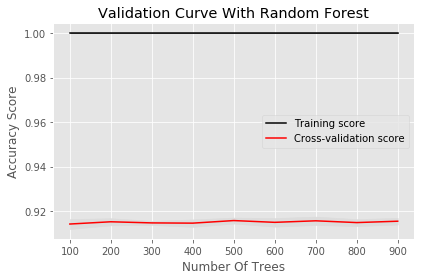

In [18]:
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scoreNum, axis=1)
train_std = np.std(train_scoreNum, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scoreNum, axis=1)
test_std = np.std(test_scoreNum, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="red")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

# 2. Wybór najlepszego hiperparametru max_depth
max_depth : Parametr max_depth określa maksymalną głębokość każdego drzewa. Domyślna wartość parametru max_depth to None, co oznacza, że każde drzewo będzie się rozwijać, aż każdy liść będzie czysty. Czysty liść to taki, w którym wszystkie dane na liściu pochodzą z tej samej klasy.
    
Zostało wybrane nastepujące liczby dla param_range = [0, 5, 10, 15, 20, 30, 40, 50,60] . Wykres pokazuje, że od max_depth = 10 jest wysoka zdolność predykcji.

In [19]:
param_range = [2, 5, 10, 15, 20, 30, 40, 50,60]
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(), 
                                X = Xtrain, y = ytrain,
                                param_name = 'max_depth',
                                param_range = param_range, cv=3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

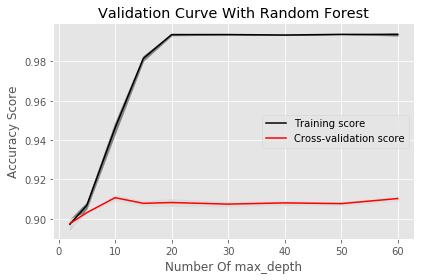

In [20]:
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scoreNum, axis=1)
train_std = np.std(train_scoreNum, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scoreNum, axis=1)
test_std = np.std(test_scoreNum, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="red")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of max_depth")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

# 3. Wybór najlepszego hiperparametru min_samples_split

min_samples_split : parametr min_samples_split określa minimalną liczbę próbek wymaganych do podziału wewnętrznego węzła liścia. Wartością domyślną tego parametru jest 2, co oznacza, że węzeł wewnętrzny musi mieć co najmniej dwie próbki, aby można go było podzielić, aby uzyskać bardziej szczegółową klasyfikację.

Wtydaje mi się że najlepszy parametr będzie 2

In [21]:
param_range = [2, 3, 4, 5, 6, 7, 8, 9,11,15]
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(), 
                                X = Xtrain, y = ytrain,
                                param_name = 'min_samples_split',
                                param_range = param_range, cv=3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

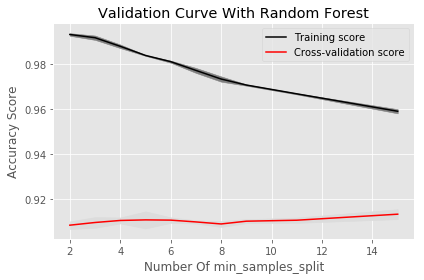

In [22]:
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scoreNum, axis=1)
train_std = np.std(train_scoreNum, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scoreNum, axis=1)
test_std = np.std(test_scoreNum, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="red")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of min_samples_split")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

# 3. Wybór najlepszego hiperparametru min_samples_leaf

min_samples_leaf: parametr min_samples_leaf określa minimalną liczbę próbek wymaganych w węźle liścia. Wartością domyślną tego parametru jest 1, co oznacza, że każdy liść musi mieć co najmniej 1 próbkę, którą klasyfikuje.

Według mnie najlepsze jest min_samples_leaf = 1

In [23]:
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9,11,15]
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(), 
                                X = Xtrain, y = ytrain,
                                param_name = 'min_samples_leaf',
                                param_range = param_range, cv=3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

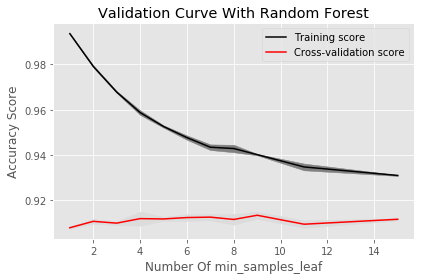

In [24]:
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scoreNum, axis=1)
train_std = np.std(train_scoreNum, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scoreNum, axis=1)
test_std = np.std(test_scoreNum, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="red")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of min_samples_leaf")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

# Model Random Forest Classifier z nowymi parametrami

random_state = 1, n_estimators = 20, max_depth = 10, min_samples_split = 2, min_samples_leaf = 1

In [25]:
forestVCG = RandomForestClassifier (random_state = 1, 
                                  n_estimators = 200, 
                                  max_depth = 10, 
                                  min_samples_split = 2, min_samples_leaf = 1) 
modelF = forestVCG.fit(Xtrain, ytrain)
y_predF = modelF.predict(Xtest)

In [26]:
ypred = forestVCG.predict(Xtest)

In [27]:
co_matrix = metrics.confusion_matrix(ytest, ypred)
co_matrix

array([[11813,   249],
       [  939,   592]], dtype=int64)

In [28]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     12062
           1       0.70      0.39      0.50      1531

   micro avg       0.91      0.91      0.91     13593
   macro avg       0.82      0.68      0.73     13593
weighted avg       0.90      0.91      0.90     13593



In [29]:
print("Accuracy:   ",np.round(metrics.accuracy_score(ytest, ypred), decimals=2))
print("Precision:  ",np.round(metrics.precision_score(ytest, ypred), decimals=2))
print("Recall:     ",np.round(metrics.recall_score(ytest, ypred), decimals=2))
print("F1 score:   ",np.round(metrics.f1_score(ytest, ypred), decimals=2))

Accuracy:    0.91
Precision:   0.7
Recall:      0.39
F1 score:    0.5


Model Random Forest Classifier z nowymi parametrami

1. Accuracy:    0.91
2. Precision:   0.7
3. Recall:      0.39
4. F1 score:    0.5

Stare parametry

1. Accuracy:    0.91
2. Precision:   0.66
3. Recall:      0.48
4. F1 score:    0.56

# Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

Parameteres = {'C': np.power(10.0, np.arange(-3, 3))}
LR = LogisticRegression(warm_start = True)
LR_Grid = GridSearchCV(LR, param_grid = Parameteres, scoring = 'roc_auc', n_jobs = 5, cv=2)

LR_Grid.fit(Xtrain, ytrain) 

In [ ]:
ypred = LR_Grid.predict(Xtest)

In [ ]:
## confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

co_matrix = metrics.confusion_matrix(ytest, ypred)
co_matrix

In [ ]:
print(classification_report(ytest, ypred)) 

In [ ]:
print("Accuracy:   ",np.round(metrics.accuracy_score(ytest, ypred), decimals=2))
print("Precision:  ",np.round(metrics.precision_score(ytest, ypred), decimals=2))
print("Recall:     ",np.round(metrics.recall_score(ytest, ypred), decimals=2))
print("F1 score:   ",np.round(metrics.f1_score(ytest, ypred), decimals=2))

# Wykresy doboru hiperparmetrów dla Logistic Regression za pomocą validation_curve

In [ ]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(LogisticRegression(), X=Xtrain, y=ytrain,
                                             param_name='C', param_range=param_range, cv=10)

In [ ]:
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scoreNum, axis=1)
train_std = np.std(train_scoreNum, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scoreNum, axis=1)
test_std = np.std(test_scoreNum, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="red")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of min_samples_leaf")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()